## The goal of this notebook is to serve as an example of usage for the regression package

In [1]:
# Imports Go Here
# Public Libraries
import numpy as np
import matplotlib.pyplot as plt
# Custom Libraries
import regression as reg

### Before we start working with a regression package we first need to generate some data. So let's generate some fake data.

In [2]:
def generate_fake_data(predictors:np.ndarray,noise:bool = False,noise_size:float = 0.05) -> tuple[np.ndarray,np.ndarray]:
    '''
        This generates a fake time series based on the inputs. It will randomly determine the
        weights applied to the inputs and reports those weights as well for verifiction of any
        fit applied to this time series.

        Inputs:
        predictors (np.ndarray): An N x M numpy array where there are N inputs of length M. If
        all of the inputs are not of the same length an error will be raised.
        noise (bool): A boolean variable that determines whether or not to add noise to the
        resultant time series. Default (False).
        noise_size (float): The size of the noise (in percent) to the size of the time series
        generated. E.g. if noise_size = 0.1 the noise will be ~10% the size of the measurements.

        Outputs:
        Weights (np.ndarray): A 1-D numpy array of length N+1 reporting the weights applied to
        the inputs as well as the bias term applied to the data for regression verification.
        Fake_Data_Time_Series (np.ndarray): A 1-D numpy array of length M which is the time
        series of fake data generated by this function.
    '''

    #generate the random weights on the predictors
    weights = (np.random.random(size = predictors.shape[0]+1) - 0.5)*2

    #generate the time series
    Fake_Data_Time_Series = np.dot(np.swapaxes(predictors,0,1),weights[:-1])+weights[-1]

    #add noise if applicable
    if noise:
        Fake_Data_Time_Series += np.random.normal(0,np.abs(noise_size*np.mean(Fake_Data_Time_Series)),size = len(Fake_Data_Time_Series))

    return weights,Fake_Data_Time_Series

def report_weights(weights:np.ndarray):
    '''
        Reports the weights from generate_fake_data as they are reported from the regression
        model for ease of comparison.

        Inputs:
        weights(np.ndarray): The weights generated by generate_fake_data.

        Outputs: None
    '''

    weight_names = ['Variable ' + str(int(w+1)) for w in range(len(weights)-1)]
    sorted_inds = np.flip(np.argsort(weights[:-1]))

    print('True Weights:')
    print('----------------------')
    for i in range(len(weight_names)):
        print(weight_names[sorted_inds[i]] + ': ' + f'{weights[sorted_inds[i]]:0.3f}')
    print(f'Bias Term: {weights[-1]:0.3f}')
    print('----------------------')

    return None


In [3]:
#Make inputs to our fake data function
N = 50
Input_1 = np.random.random(N)*10
Input_2 = np.random.random(N)*10
Input_Array = np.array([Input_1,Input_2])

no_noise_weights,no_noise_time_series = generate_fake_data(Input_Array)

In [4]:
# now let's make a regression model and look at its results
# first we can define a model by calling the package 'reg' and creating a regression object
no_noise_model = reg.regression(Y = no_noise_time_series,X = Input_Array)

In [5]:
#We can then fit the model by calling the .fit() method on it
no_noise_model.fit()
# This gives a summary report below

Fit Complete, Elapsed Time (Seconds): 4.10
Epochs Needed: 10000, 100.0% of Max
Model R^2: 1.000, Model MSE: 0.000


In [6]:
# Now let's compare the model's results against those of the true weights
no_noise_model.summary_report()
report_weights(no_noise_weights)

Model Weight Summary Statistics:
--------------------------------
Variable 1: -0.525
Variable 2: -0.980
Bias Term: -0.831
--------------------------------
True Weights:
----------------------
Variable 1: -0.525
Variable 2: -0.980
Bias Term: -0.831
----------------------


#### This seems good in terms of raw numbers but let's look at a plot to verify

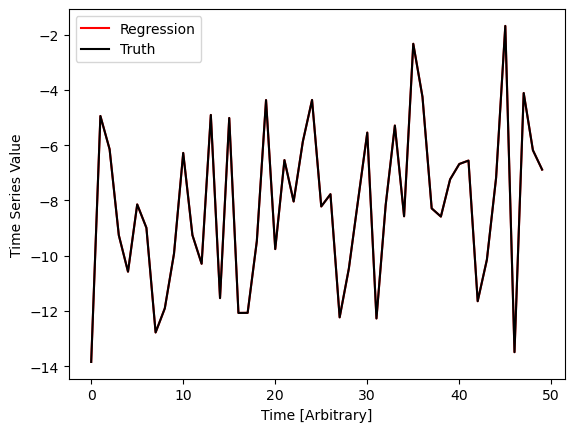

In [7]:
plt.plot(no_noise_model.make_prediction(Input_Array),color = 'r',label = 'Regression')
plt.plot(no_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

#### This seems good, let's next look at what happens if noise is added

In [32]:
#Make inputs to our fake data function
N = 50
Input_1_noise = np.random.random(N)
Input_2_noise = np.random.random(N)
Input_Array_noise = np.array([Input_1_noise,Input_2_noise])

noise_weights,noise_time_series = generate_fake_data(Input_Array_noise,noise = True)

In [33]:

# now let's make a regression model and look at its results
noise_model = reg.regression(Y = noise_time_series,X = Input_Array_noise)
noise_model.fit()
print('--------------------------')
noise_model.summary_report()
report_weights(noise_weights)

Fit Complete, Elapsed Time (Seconds): 0.17
Epochs Needed: 1261, 12.6% of Max
Model R^2: 0.986, Model MSE: 0.001
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 2: -0.443
Variable 1: -0.612
Bias Term: 0.042
--------------------------------
True Weights:
----------------------
Variable 2: -0.518
Variable 1: -0.605
Bias Term: 0.075
----------------------


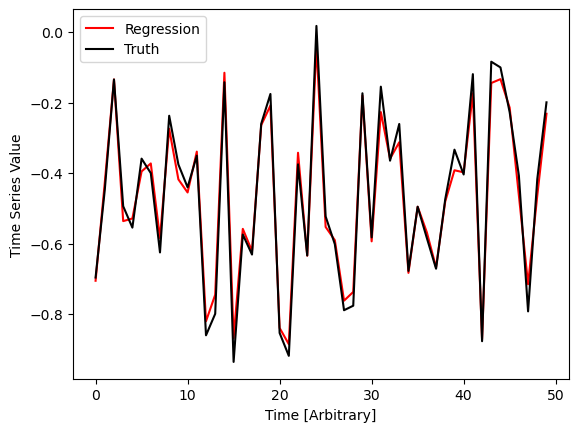

In [34]:
plt.plot(noise_model.make_prediction(Input_Array_noise),color = 'r',label = 'Regression')
plt.plot(noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

#### The fit is worse. Let's see if we can improve it by changing the settings of the model

In [35]:
# now let's make a regression model and look at its results
# The Learning rate controls how fine a change the model can make between iterations
# The patience pct controls how long the model should wait before stopping the fit early
# Max iterations changes how many epochs the model can try to find a got fit with. The larger
# this number the longer the regression will run
noise_model = reg.regression(Y = noise_time_series,X = Input_Array_noise,
                             learning_rate=1e-3,patience_pct=1e-5, max_iterations=25000)
noise_model.fit()
print('--------------------------')
noise_model.summary_report()
report_weights(noise_weights)

Fit Complete, Elapsed Time (Seconds): 22.57
Epochs Needed: 25000, 100.0% of Max
Model R^2: 0.991, Model MSE: 0.001
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 2: -0.508
Variable 1: -0.616
Bias Term: 0.079
--------------------------------
True Weights:
----------------------
Variable 2: -0.518
Variable 1: -0.605
Bias Term: 0.075
----------------------


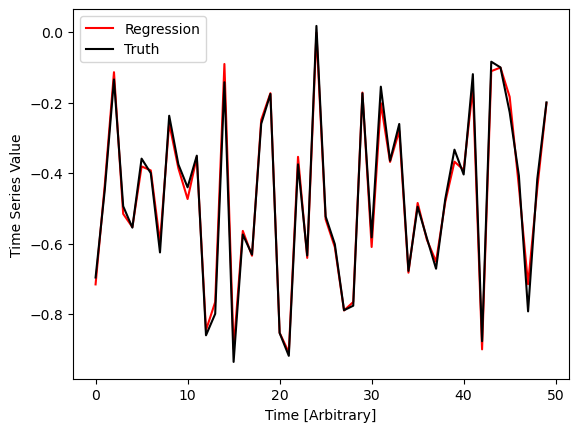

In [36]:
plt.plot(noise_model.make_prediction(Input_Array_noise),color = 'r',label = 'Regression')
plt.plot(noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

### Now let's see what happens if we drastically increase the noise

In [44]:
#Make inputs to our fake data function
N = 50
Input_1_heavy_noise = np.random.random(N)*10
Input_2_heavy_noise = np.random.random(N)*10
Input_3_heavy_noise = np.random.random(N)*10
Input_Array_heavy_noise = np.array([Input_1_heavy_noise,Input_2_heavy_noise,Input_3_heavy_noise])

heavy_noise_weights,heavy_noise_time_series = generate_fake_data(Input_Array_heavy_noise,noise = True,noise_size=0.25)

In [47]:

# now let's make a regression model and look at its results
heavy_noise_model = reg.regression(heavy_noise_time_series,Input_Array_heavy_noise,
                                   learning_rate=1e-3,patience_pct=1e-4)
heavy_noise_model.fit()
print('--------------------------')
heavy_noise_model.summary_report()
report_weights(heavy_noise_weights)

Fit Complete, Elapsed Time (Seconds): 2.34
Epochs Needed: 6911, 69.1% of Max
Model R^2: 0.760, Model MSE: 9.759
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 2: 0.802
Variable 3: 0.076
Variable 1: -0.089
Bias Term: 1.125
--------------------------------
True Weights:
----------------------
Variable 2: 0.823
Variable 3: 0.450
Variable 1: -0.151
Bias Term: -0.660
----------------------


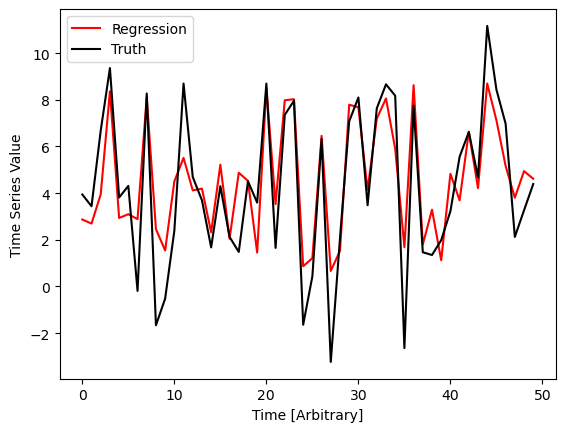

In [48]:
plt.plot(heavy_noise_model.make_prediction(Input_Array_heavy_noise),color = 'r',label = 'Regression')
plt.plot(heavy_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.show()

#### Performance is worse but still isn't bad.

#### Now let's try with a lot of inputs and a reasonable amount of noise

In [71]:
#Need to increase N based on the number of inputs, more inputs more data needed to try and get at them
num_inputs = 8
N = num_inputs*50
Input_list = [np.random.random(N)*2 for i in range(num_inputs)]
Input_Array = np.array(Input_list)

many_input_weights,many_input_time_series = generate_fake_data(Input_Array,noise = True,noise_size=0.05)

In [74]:
# now let's make a regression model and look at its results
many_input_model = reg.regression(many_input_time_series,Input_Array,learning_rate=1e-2,patience_pct=1e-4,
                                  max_iterations=30000)
many_input_model.fit()
print('--------------------------')
many_input_model.summary_report()
report_weights(many_input_weights)

Fit Complete, Elapsed Time (Seconds): 0.15
Epochs Needed: 361, 1.2% of Max
Model R^2: 0.969, Model MSE: 0.779
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 2: 1.028
Variable 3: 0.647
Variable 5: 0.175
Variable 6: -0.084
Variable 8: -0.122
Variable 7: -0.513
Variable 4: -0.565
Variable 1: -0.721
Bias Term: -0.377
--------------------------------
True Weights:
----------------------
Variable 2: 0.908
Variable 3: 0.709
Variable 5: 0.170
Variable 8: -0.107
Variable 6: -0.274
Variable 7: -0.686
Variable 4: -0.739
Variable 1: -0.842
Bias Term: 0.368
----------------------


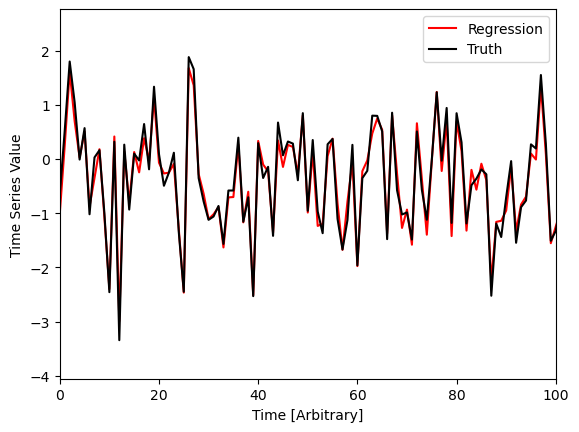

In [75]:
plt.plot(many_input_model.make_prediction(Input_Array),color = 'r',label = 'Regression')
plt.plot(many_input_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.xlim(0,100)
plt.show()

#### Now let's look at what happens with a linear interaction model

In [76]:
#Make inputs to our fake data function
N = 150
Input_1_interaction = np.random.random(N)*2
Input_2_interaction = np.random.random(N)*2
Input_3_interaction = (Input_1_interaction*Input_2_interaction)
Input_Array_interaction = np.array([Input_1_interaction,Input_2_interaction,Input_3_interaction])

interaction_no_noise_weights,interaction_no_noise_time_series = generate_fake_data(Input_Array_interaction,noise = False)

In [79]:

# take away the interaction input so the model can't see it and change the model type to linear_with_interaction
interaction_model = reg.regression(interaction_no_noise_time_series,Input_Array_interaction[:-1],learning_rate=1e-3,patience_pct=1e-4,
                                   model_type='linear_with_interaction',max_iterations=50000)
interaction_model.fit()
print('--------------------------')
interaction_model.summary_report()
report_weights(interaction_no_noise_weights)

Fit Complete, Elapsed Time (Seconds): 86.50
Epochs Needed: 50000, 100.0% of Max
Model R^2: 1.000, Model MSE: 0.342
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 1: 0.922
Variable 1-Variable 2 Interaction: 0.490
Variable 2: 0.079
Bias Term: 0.378
--------------------------------
True Weights:
----------------------
Variable 1: 0.926
Variable 3: 0.486
Variable 2: 0.083
Bias Term: 0.373
----------------------


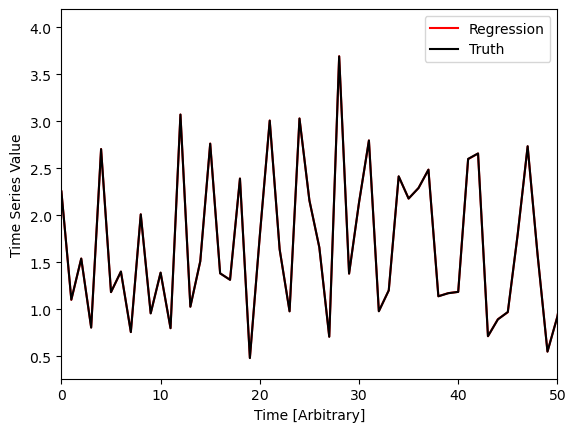

In [81]:
plt.plot(interaction_model.make_prediction(Input_Array_interaction[:-1]),color = 'r',label = 'Regression')
plt.plot(interaction_no_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.xlim(0,50)
plt.show()

#### Now let's add noise to the interaction model

In [88]:
#Make inputs to our fake data function
N = 150
Input_1_interaction = (np.random.random(N)+ 0.5)*6
Input_2_interaction = (np.random.random(N)- 0.5)*5
Input_3_interaction = (np.random.random(N) + 1) * 4
Input_4_interaction = (Input_1_interaction*Input_2_interaction)
Input_5_interaction = (Input_1_interaction*Input_3_interaction)
Input_6_interaction = (Input_2_interaction*Input_3_interaction)

Input_Array_interaction = np.array([Input_1_interaction,Input_2_interaction,Input_3_interaction,
                                    Input_4_interaction,Input_5_interaction,Input_6_interaction])

interaction_noise_weights,interaction_noise_time_series = generate_fake_data(Input_Array_interaction,noise = True)

In [90]:

# take away the interaction input so the model can't see it and change the model type to linear_with_interaction
interaction_model = reg.regression(interaction_noise_time_series,Input_Array_interaction[:-3],learning_rate=1e-4,patience_pct=1e-4,
                                   model_type='linear_with_interaction',max_iterations=50000)
interaction_model.fit()
print('--------------------------')
interaction_model.summary_report()
report_weights(interaction_noise_weights)

Fit Complete, Elapsed Time (Seconds): 3.06
Epochs Needed: 7901, 15.8% of Max
Model R^2: 0.985, Model MSE: 1494.028
--------------------------
Model Weight Summary Statistics:
--------------------------------
Variable 1-Variable 3 Interaction: 0.953
Variable 2: 0.707
Variable 2-Variable 3 Interaction: 0.586
Variable 3: 0.325
Variable 1: -0.477
Variable 1-Variable 2 Interaction: -0.898
Bias Term: 0.629
--------------------------------
True Weights:
----------------------
Variable 5: 0.994
Variable 6: 0.699
Variable 3: 0.395
Variable 2: -0.066
Variable 1: -0.678
Variable 4: -0.893
Bias Term: -0.054
----------------------


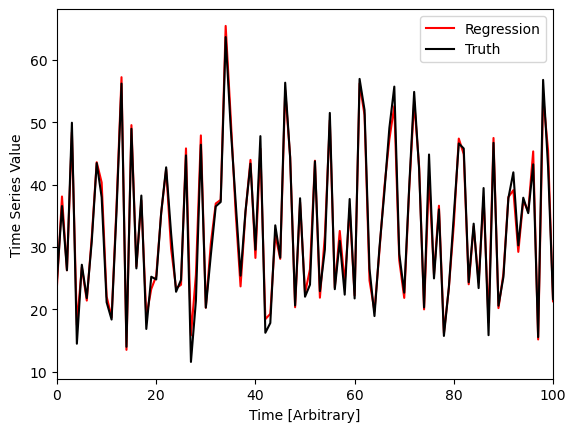

In [93]:
plt.plot(interaction_model.make_prediction(Input_Array_interaction[:-3]),color = 'r',label = 'Regression')
plt.plot(interaction_noise_time_series,color = 'k',label = 'Truth')
plt.legend(loc = 'best')
plt.ylabel('Time Series Value')
plt.xlabel('Time [Arbitrary]')
plt.xlim(0,100)
plt.show()

#### You can also give the model the names of variables and it will use them in the summary it provides

In [134]:
N = 50
Input_1_name = np.random.random(N)*10
Input_2_name = np.random.random(N)*10
Input_3_name = np.random.random(N)*10
Input_name_list = ['Pepperoni','Cheese','Veggie']

Input_Array_name = np.array([Input_1_name,Input_2_name,Input_3_name])

name_weights,name_time_series = generate_fake_data(Input_Array_name)

In [137]:
name_model = reg.regression(name_time_series,Input_Array_name,predictor_names=Input_name_list,
                            learning_rate=1e-2,patience_pct=1e-5)
name_model.fit()
name_model.summary_report()
report_weights(name_weights)

Fit Complete, Elapsed Time (Seconds): 0.71
Epochs Needed: 3311, 33.1% of Max
Model R^2: 1.000, Model MSE: 1.430
Model Weight Summary Statistics:
--------------------------------
Pepperoni: 0.799
Veggie: -0.210
Cheese: -0.524
Bias Term: -0.084
--------------------------------
True Weights:
----------------------
Variable 1: 0.799
Variable 3: -0.210
Variable 2: -0.524
Bias Term: -0.085
----------------------


#### If you make it an interaction model the variables will be given interaction names automatically as well

In [144]:
name_model = reg.regression(name_time_series,Input_Array_name,predictor_names=Input_name_list,
                            learning_rate=1e-4,patience_pct=1e-5,model_type='linear_with_interaction',
                            max_iterations=20000)
name_model.fit()
name_model.summary_report()
report_weights(name_weights)

Fit Complete, Elapsed Time (Seconds): 15.44
Epochs Needed: 20000, 100.0% of Max
Model R^2: 0.998, Model MSE: 1.243
Model Weight Summary Statistics:
--------------------------------
Pepperoni: 0.724
Cheese-Veggie Interaction: 0.008
Pepperoni-Cheese Interaction: 0.007
Pepperoni-Veggie Interaction: 0.006
Veggie: -0.287
Cheese: -0.612
Bias Term: 0.607
--------------------------------
True Weights:
----------------------
Variable 1: 0.799
Variable 3: -0.210
Variable 2: -0.524
Bias Term: -0.085
----------------------
